Labels:

0 - Negative

1 - Positive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wc
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer as cv

In [2]:
df = pd.read_csv('../Dataset/train.csv')

In [3]:
df.shape

(12000, 2)

In [4]:
df.sample(5)

,Review,Sentiment
1398,my internet is 100 mbps this router provide 97...,1
1085,nice but price may be high,1
9071,almost just good but over price,0
7410,its not good this shoes like a school shoes my...,-1
8708,very bad manufacturing but if manufacturing im...,0


In [5]:
df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

<Axes: ylabel='Frequency'>

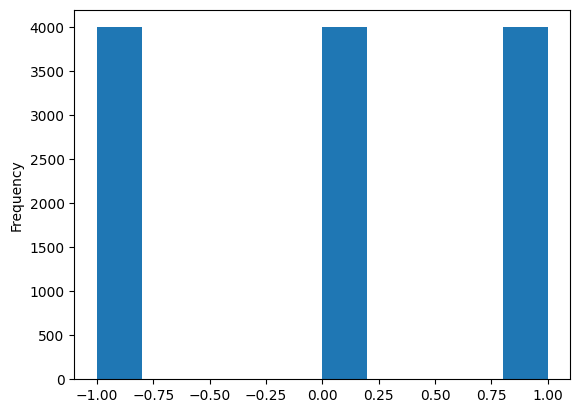

In [6]:
df['Sentiment'].plot(bins=10, kind='hist')

In [7]:
negative_reviews = df[df['Sentiment']==-1]
negative_reviews.iloc[:3]

,Review,Sentiment
4000,this product very wost,-1
4001,boring,-1
4002,music sound bass clarity is all great bluetoot...,-1


In [8]:
neutral_reviews = df[df['Sentiment']==0]
neutral_reviews.iloc[:3]

,Review,Sentiment
8000,ordinary device,0
8001,just sturdy,0
8002,thanxxx amazon nice product love it,0


In [9]:
positive_reviews = df[df['Sentiment']==1]
positive_reviews.iloc[:3]

,Review,Sentiment
0,gud product value for money,1
1,that is very good product i like it,1
2,top quality product,1


In [10]:
pos_list = positive_reviews['Review'].tolist()
pos_list[:3]

['gud product value for money',
 'that is very good product i like it',
 'top quality product']

In [11]:
pos_string = " ".join(pos_list)
len(pos_string)

336466

In [12]:
neu_list = neutral_reviews['Review'].tolist()
neu_list[:2]

['ordinary device', 'just sturdy']

In [13]:
neu_string = " ".join(neu_list)
len(neu_string)

235496

In [14]:
neg_list = negative_reviews['Review'].tolist()
neg_list[:3]

['this product very wost',
 'boring ',
 'music sound bass clarity is all great bluetooth connectivity is fine 5k i spent on this and its worth every penny but if we consider actual price of 8k or 7k then it needs some enhancements and with remote it lacks design the button layout to change the source is also bad']

In [15]:
neg_string = " ".join(neg_list)
len(neg_string)

296101

In [16]:
#remove punctuation and unwanted words
punctuation_ = string.punctuation + '1234567890Â©á»áº¯ÄÃ'+ '¢`~¡¢£¤¥¦§¨©ª«¬®¯°±²³´µ¶·¸¹º»¼½¾¿×÷¢£¤¥¦§©´µ¶·¸¹º€£¥₹₽₿₣₱₩₨₫₮₭₣₢₥₦₠₡₧₤₮₯₰₲₱₴₵₸₹₺₻₼₽₿'
punctuation_

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~1234567890Â©á»áº¯ÄÃ¢`~¡¢£¤¥¦§¨©ª«¬®¯°±²³´µ¶·¸¹º»¼½¾¿×÷¢£¤¥¦§©´µ¶·¸¹º€£¥₹₽₿₣₱₩₨₫₮₭₣₢₥₦₠₡₧₤₮₯₰₲₱₴₵₸₹₺₻₼₽₿'

In [17]:
pos_list=[ch for ch in pos_string if ch not in punctuation_]
pos_string = ''.join(pos_list)
len(pos_string)

333981

In [18]:
neu_list=[ch for ch in neu_string if ch not in punctuation_]
neu_string = ''.join(neu_list)
len(neu_string)

232644

In [19]:
neg_list=[ch for ch in neg_string if ch not in punctuation_]
neg_string = ''.join(neg_list)
len(neg_string)

293084

In [20]:
#remove stopwords
stopw = stopwords.words('english')
stopw.extend(list(string.ascii_lowercase))
# stopw.extend(['0','1','2','3','4','5','6','7','8','9'])
stopw[:5]

['i', 'me', 'my', 'myself', 'we']

In [21]:
pos_list = [word for word in pos_string.split() if word.lower() not in stopw]
pos_string = " ".join(pos_list)
len(pos_string)

241145

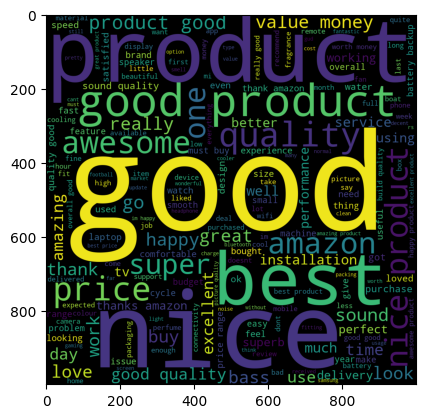

In [22]:
wordcloud = wc(width=1000, height=1000, background_color='black').generate(pos_string)
plt.imshow(wordcloud)

In [23]:
neu_list = [word for word in neu_string.split() if word.lower() not in stopw]
neu_string = " ".join(neu_list)
len(neu_string)

162837

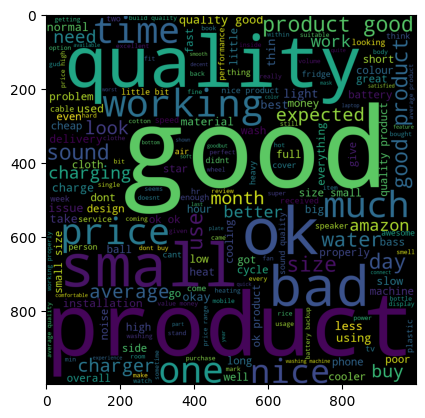

In [24]:
wordcloud = wc(width=1000, height=1000, background_color='black').generate(neu_string)
plt.imshow(wordcloud)

In [25]:
neg_list = [word for word in neg_string.split() if word.lower() not in stopw]
neg_string = ' '.join(neg_list)
len(neg_string)

208209

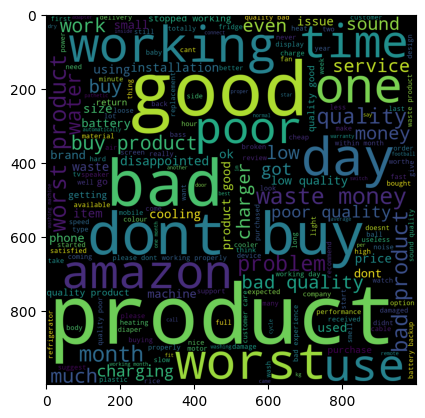

In [26]:
wordcloud = wc(width=1000, height=1000, background_color='black').generate(neg_string)
plt.imshow(wordcloud)